# Homework 6

## Problem 2

Auhor: Chinmay Upadhye,
 Dataset: Auto

# Jupyter setup to expand cell display to 100% width on your screen (optional)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix


%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings("ignore")

C:\Users\chinm\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
auto = pd.read_csv('Auto.csv').dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 31.0+ KB


In [5]:
auto.mpg.mean()

23.515869017632241

In [6]:
X1 = PolynomialFeatures(1).fit_transform(auto.displacement.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(auto.displacement.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(auto.displacement.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(auto.displacement.reshape(-1,1))

y = (auto.mpg > 23).map({False:0, True:1}).as_matrix()
print('X4:\n', X4[:5])
print('y:\n', y[:5])

X4:
 [[  1.00000000e+00   3.07000000e+02   9.42490000e+04   2.89344430e+07
    8.88287400e+09]
 [  1.00000000e+00   3.50000000e+02   1.22500000e+05   4.28750000e+07
    1.50062500e+10]
 [  1.00000000e+00   3.18000000e+02   1.01124000e+05   3.21574320e+07
    1.02260634e+10]
 [  1.00000000e+00   3.04000000e+02   9.24160000e+04   2.80944640e+07
    8.54071706e+09]
 [  1.00000000e+00   3.02000000e+02   9.12040000e+04   2.75436080e+07
    8.31816962e+09]]
y:
 [0 0 0 0 0]


In [7]:
fit2 = sm.GLS(auto.mpg, X4).fit()
fit2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,46.3144,5.742,8.066,0.000,35.026,57.603
x1,-0.2136,0.118,-1.817,0.070,-0.445,0.018
x2,0.0006,0.001,0.725,0.469,-0.001,0.002
x3,-8.933e-07,2.28e-06,-0.391,0.696,-5.38e-06,3.59e-06
x4,6.194e-10,2.24e-09,0.277,0.782,-3.78e-09,5.02e-09


In [8]:
fit_1 = fit = sm.GLS(auto.mpg, X1).fit()
fit_2 = fit = sm.GLS(auto.mpg, X2).fit()
fit_3 = fit = sm.GLS(auto.mpg, X3).fit()
fit_4 = fit = sm.GLS(auto.mpg, X4).fit()
sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,395.0,8557.946288,0.0,NaN,NaN,NaN
1,394.0,7552.691960,1.0,1005.254328,52.359753,2.433158e-12
2,393.0,7527.475122,1.0,25.216839,1.313446,2.524690e-01
3,392.0,7526.003706,1.0,1.471416,0.076640,7.820490e-01


In [9]:
X = X4

In [10]:
clf = sm.GLM(y, X, family=sm.families.Binomial(sm.families.links.logit))
res = clf.fit()

In [11]:
displacement_grid = np.arange(auto.mpg.min(), auto.mpg.max()).reshape(-1,1)
X_test = PolynomialFeatures(4).fit_transform(displacement_grid)
pred = res.predict(X_test)

Text(0,0.5,'Pr(mpg>23|displacement)')

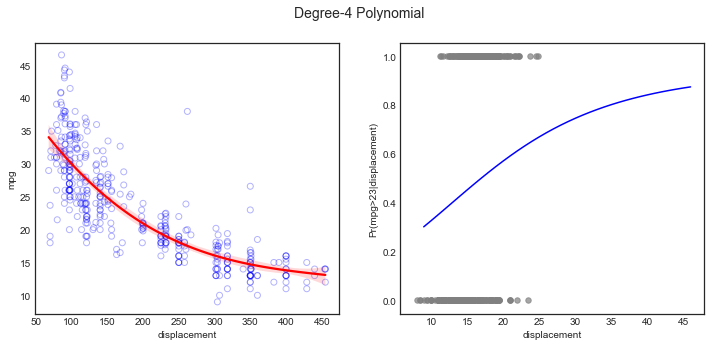

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(auto.displacement, auto.mpg, facecolor='None', edgecolor='b', alpha=0.3)
sns.regplot(auto.displacement, auto.mpg, order = 3, truncate=True,color='r', scatter=False, ax=ax1)

# Logistic regression showing Pr(wage>250) for the age range.
ax2.plot(displacement_grid, pred, color='b')

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(auto.acceleration, y, s=30, c='grey', alpha=0.7)

# ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('displacement')
ax2.set_ylabel("Pr(mpg>23|displacement)")